### Implement the Random Forest Classifier to customer churn dataset and interpret churning

##### Problem Statement:

To predict churning out customers

We are going to implement the random forest classifier to customer churn dataset and interpret churning.


#### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Load dataset 

In [35]:
churn_data=pd.read_csv('customer_churn.csv')

In [36]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
churn_data.shape

(7043, 21)

In [39]:
churn_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [40]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting the total charges column to numeric, because as you can see its original dtype is object but data is numeric.

In [41]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'],errors='coerce')

In [42]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Missing Values

In [43]:
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see from above output total charges is having 11 null values. as we don't have a appropriate total charges we will be dropping the 11 null values rows in the same data table.


In [44]:
churn_data.dropna(inplace=True)

In [45]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As customerID is now where helping in the prediction and also in its value are not appropriate to fit in the model we will be dropping the customer ID column.

In [46]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
churn_data.drop(columns=['customerID'],inplace=True)

In [48]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
churn_data.drop(columns=['gender'],inplace=True)

In [51]:
churn_data.drop(columns=['PhoneService'],inplace=True)

In [52]:
churn_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [53]:
churn_data.shape

(7032, 18)

In [54]:
churn_data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Label Encoding

Encoding all the labels as numerical categories as because this kinds of the string data canot be used to fit as  these are incompatible type to the fit the classification model this can be performed through label-encoding or using the map() function.


In [55]:
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [56]:
churn_data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,0,0,0,2,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,2,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes


In [57]:
churn_data.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

So now after encoding you can check that the dtypes of all the data is numerical where this data fits into any classification probelm perfecty

#### Data Visualization

Starting with visualizing how many customers have churned out and how many are still in contract with the company

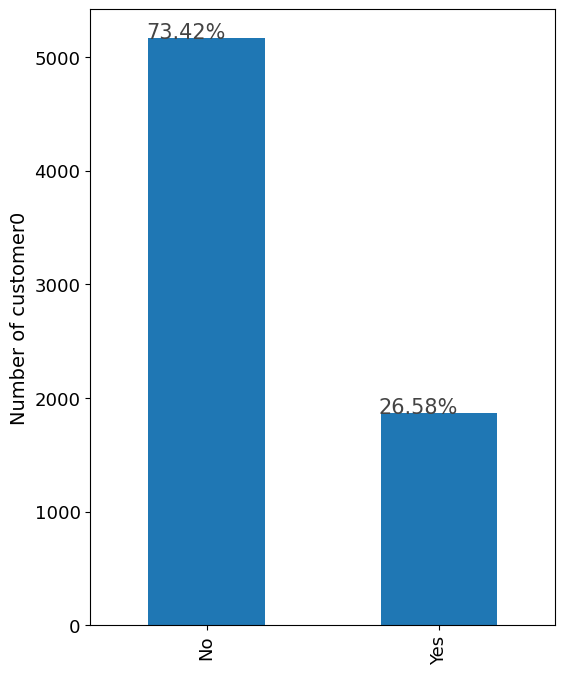

In [58]:
ax=churn_data['Churn'].value_counts().plot(kind='bar',figsize=(6,8),fontsize=13)
ax.set_ylabel("Number of customer0",fontsize=14);

totals=[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

from the above visualization it clear that 26.58% of people have churned out and 73.43% people have not churned

1. scatter plot

from this 1st scatter plot we can infer that , more the  tatal charge ,and higher the tenure, less the churning rate

because as from visualization the more people are churned out are the one's with less total charge and less tenure 


2. scatter plot

from this 2nd scatter plot we can infer that , more the  montly charge ,and higher the tenure, less the churning rate.

because as from visualization the more people are churned out are the one's with less mothly charge and less tenure 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

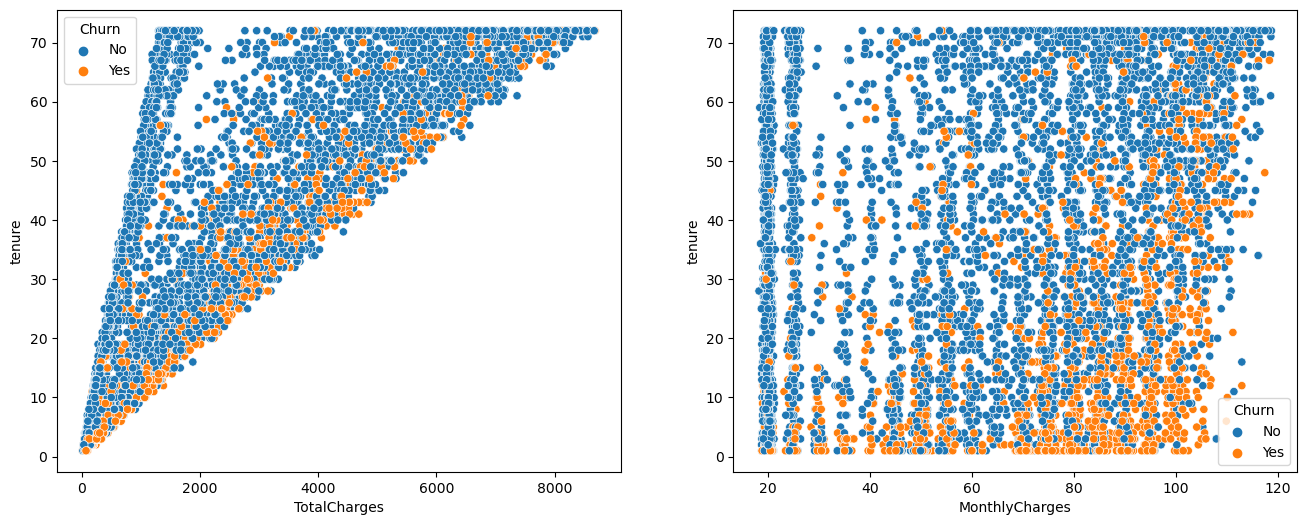

In [60]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[1])

From the below heatmap we can check the correlation between the features

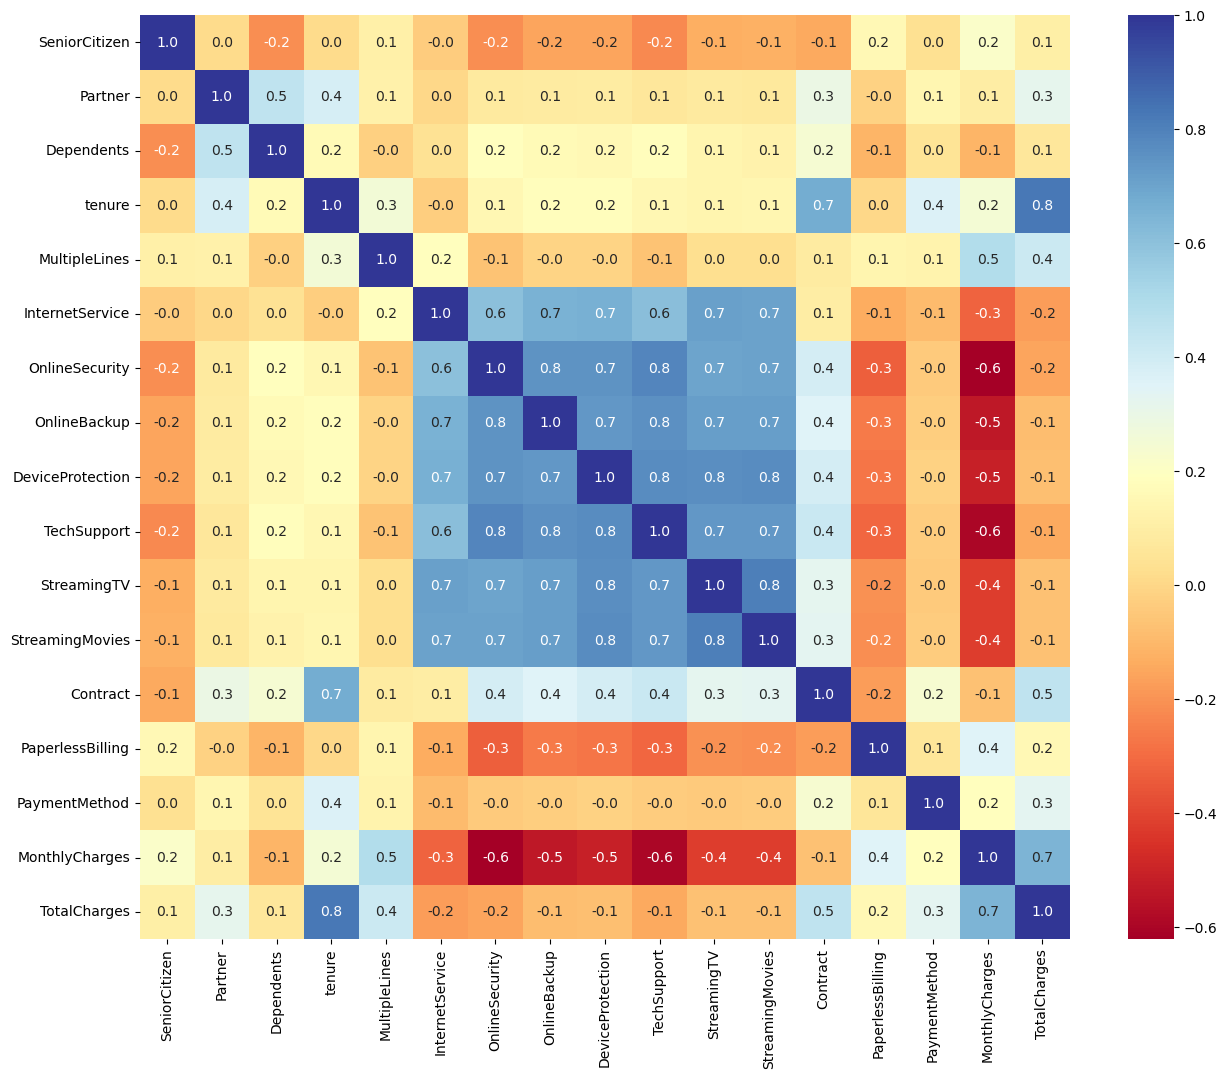

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(churn_data.corr(),cmap="RdYlBu",annot=True,fmt=".1f")
plt.show()

#### Model Building

 we will map the churn column with 1 and 0 instead od 0yes and no so that all the features and label  will have uniform datatype

In [62]:
churn_data['Churn']=churn_data['Churn'].map({'Yes':1,'No':0})

As our man prediction is to check the churning out customers, so we consider churn as dependent data and all other features are considered as independent (feature after feature selection)

In [64]:
X=churn_data.iloc[:,:-1].values
y=churn_data.iloc[:,-1].values

#### Split the train and test data

Splitting the data into train and test data ,as training data will be used for training the model and test data is for prediction.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Now we will be fit the data into random forest classifier. as random forest is ensemble method we will be importing random forest classifier from sklearn ensemble library.

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(random_state=42)

In [72]:
random_model1=random_forest.fit(X_train,y_train)

Checking for prediction for the above the fit model

In [73]:
y_pred=random_model1.predict(X_test)

From the prediction result(predicted values) and test value(actual value ) we'll check the model efficiency

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7839374555792467

from the above accuracy we can infer that the model is having 78.39% accuracy that is out of 100 predictions we'll be getting 78 predictions as true prediction

#### Hyper parameter tuning

**Hyper-parameters**  are parameters that define the model structure, and **tuning** hyper-parameters is the process of finding the best model structure. So that model  structure makes the model more efficient

There are two techniques for hyper parameter tuning :
    1.RandomizedSearchCV
    2.GridSearchCV
    
For our model we will be implementing  RandomizedSearchCV method and tune our model

So we'll select the best values for each parameter ,below code help's  us to extract the best values for each parameter

In [76]:
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest 
n_estimators=[int(x) for x in np.linspace(start=200,stop=200,num=10)]
#number of features to consider at every split 
max_features=['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 200, 200, 200, 200, 200, 200, 200, 200, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


from the above fitted model you can check the best values for each parameter across 10o folds

In [79]:
rf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

so after hyperparameter tuning we have fitted the model with best parameters and best value

 check the predictions for the model fitted after tuning

In [80]:
y_pred=rf2.predict(X_test)

from the below outup we can see there is a 1.28% change in accuracy .

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7981520966595593

 implementation of  hyper parameter tuning to the model, we can see that there is increase in performance of the model

In [87]:
#rf2.cv_results_

#### Model Evaluation

 check the feature importance of the fitted model .where feature importance helps the contribution of each and every features for the built model

In [118]:
importance=random_model1.feature_importances_

In [119]:
importance= pd.Series(importance)
importance

0     0.022110
1     0.022763
2     0.020210
3     0.159143
4     0.025974
5     0.022008
6     0.038735
7     0.028005
8     0.023810
9     0.041591
10    0.019668
11    0.020940
12    0.095651
13    0.025034
14    0.051460
15    0.183004
16    0.199894
dtype: float64

In [120]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [121]:
df

,Feature,Importance


In [122]:
col_list = list(churn_data.columns)

In [123]:
col_list


['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [124]:
df['Feature']=col_list

In [125]:
df

,Feature,Importance
0,SeniorCitizen,NaN
1,Partner,NaN
2,Dependents,NaN
3,tenure,NaN
4,MultipleLines,NaN
5,InternetService,NaN
6,OnlineSecurity,NaN
7,OnlineBackup,NaN
8,DeviceProtection,NaN
9,TechSupport,NaN


In [126]:
df['Importance']=importance

In [127]:
df

,Feature,Importance
0,SeniorCitizen,0.022110
1,Partner,0.022763
2,Dependents,0.020210
3,tenure,0.159143
4,MultipleLines,0.025974
5,InternetService,0.022008
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
8,DeviceProtection,0.023810
9,TechSupport,0.041591


In [128]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
16,TotalCharges,0.199894
15,MonthlyCharges,0.183004
3,tenure,0.159143
12,Contract,0.095651
14,PaymentMethod,0.051460
9,TechSupport,0.041591
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
4,MultipleLines,0.025974
13,PaperlessBilling,0.025034


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

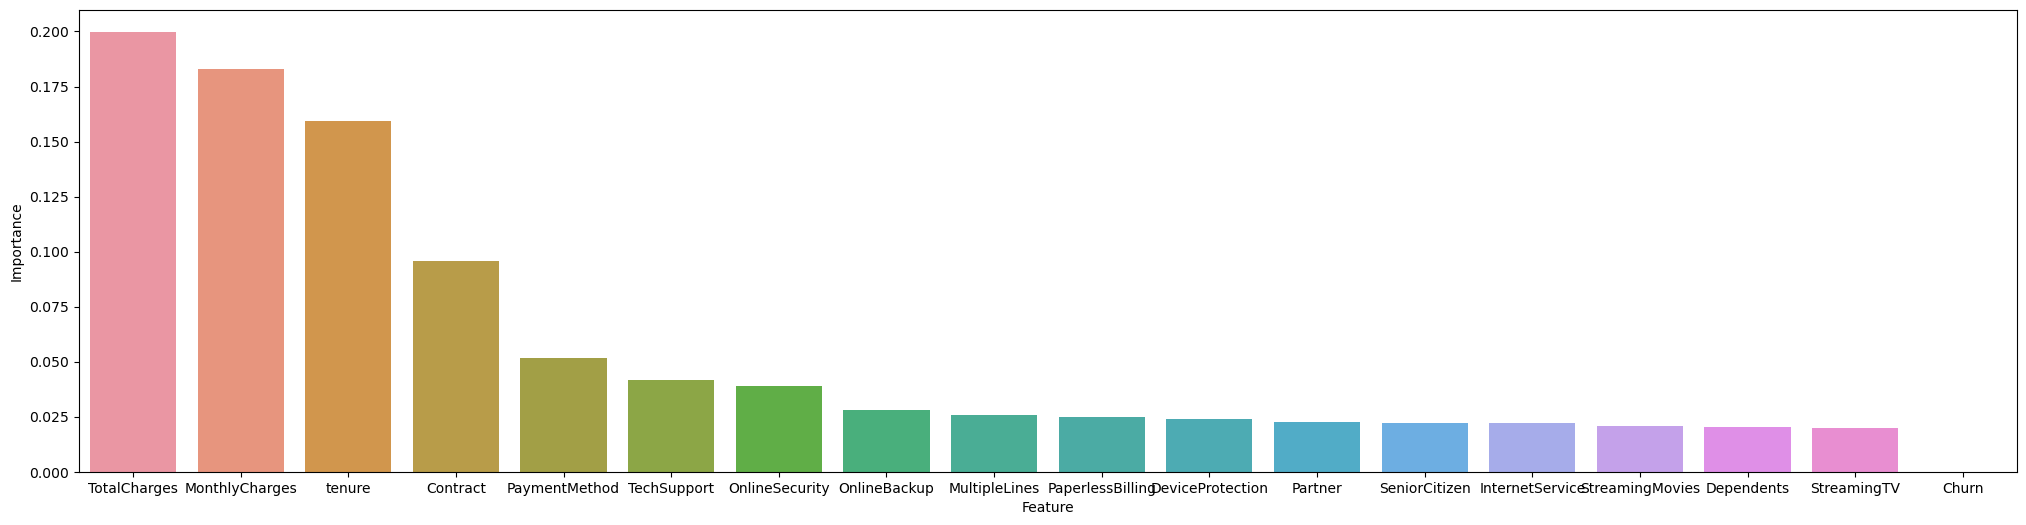

In [129]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

From the above  plot we can infer that there is only few colums which have more contribution for prediction

#### predict proba

predict_proba gives you the probabilities for the target (0 and 1 in our  case) in array form. The number of probabilities for each row is equal to the number of categories in target variable (2 in your case)

In [131]:
proba_valid = rf2.predict_proba(X_test)[:, 1]

In [132]:
proba_valid

array([0.34703287, 0.10720245, 0.23054326, ..., 0.52417605, 0.1522791 ,
       0.37530842])